<a href="https://colab.research.google.com/github/BbangB/Code/blob/main/Model_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Validation**


In [1]:
import warnings
warnings.filterwarnings('ignore')

## 1. Model Capacity

*import packages*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 *Pandas DataFrame*
            *Electric.csv from Github*

In [4]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [5]:
Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


*scatterplot(surface_area vs electricity*

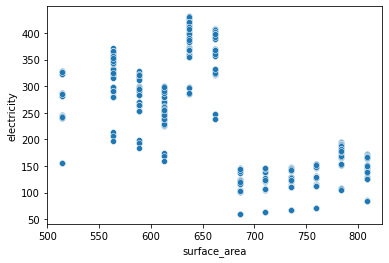

In [7]:
sns.scatterplot(Elec['surface_area'],Elec['electricity'])
plt.show()

# 1st Order Model Visualization


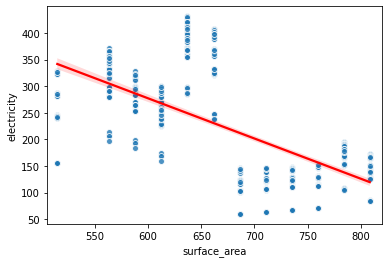

In [10]:
sns.regplot(x = 'surface_area', y= 'electricity', data= Elec,
            line_kws= {'color':'red'}, scatter_kws={'edgecolor': 'white'})
plt.xlim(505,820)
plt.show()

# 2nd Order Model Visualization


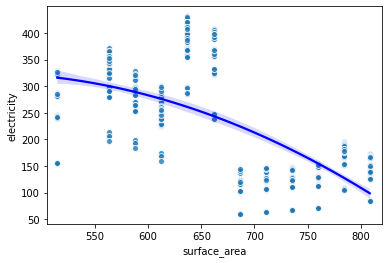

In [14]:
sns.regplot(x = 'surface_area', y= 'electricity', data = Elec,
            line_kws= {'color': 'blue'},scatter_kws={'edgecolor':'white'}, order=2)

plt.xlim(505,820)
plt.show()

# 5th Order Model Visualization


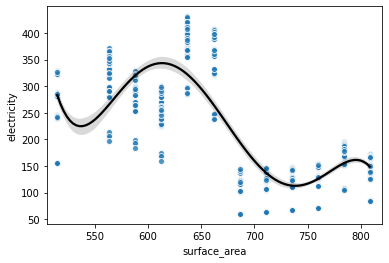

In [19]:
sns.regplot(x = 'surface_area', y= 'electricity', data = Elec,
            line_kws= {'color': 'black'},scatter_kws={'edgecolor':'white'}, order=5)

plt.xlim(505,820)
plt.show()

# 9th Order Model Visualization


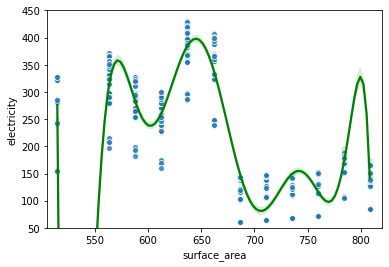

In [20]:
sns.regplot(x = 'surface_area', y= 'electricity', data = Elec,
            line_kws= {'color': 'green'},scatter_kws={'edgecolor':'white'}, order=9)

plt.xlim(505,820)
plt.ylim(50,450)
plt.show()

# Model comparison

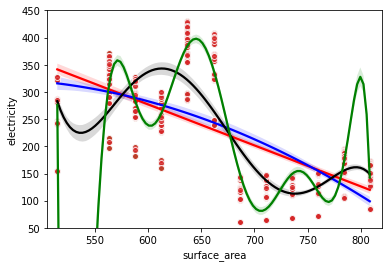

In [21]:
sns.regplot(x = 'surface_area', y= 'electricity', data= Elec,
            line_kws= {'color':'red'}, scatter_kws={'edgecolor': 'white'})

sns.regplot(x = 'surface_area', y= 'electricity', data = Elec,
            line_kws= {'color': 'blue'},scatter_kws={'edgecolor':'white'}, order=2)

sns.regplot(x = 'surface_area', y= 'electricity', data = Elec,
            line_kws= {'color': 'black'},scatter_kws={'edgecolor':'white'}, order=5)

sns.regplot(x = 'surface_area', y= 'electricity', data = Elec,
            line_kws= {'color': 'green'},scatter_kws={'edgecolor':'white'}, order=9)

plt.xlim(505,820)
plt.ylim(50,450)
plt.show()

# 2. Training Error


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
Elec = pd.read_csv(url)
Elec.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


# 1st Model Training Error

In [37]:
X_train = Elec[['surface_area']]
y_train = Elec['electricity']

X_train.shape, y_train.shape

((768, 1), (768,))

In [38]:
X_train

,surface_area
0,514.5
1,514.5
2,514.5
3,514.5
4,563.5
...,...
763,784.0
764,808.5
765,808.5
766,808.5


In [26]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print(Model_1.coef_)
print(Model_1.intercept_)

[-0.75387157]
729.4538243006992


In [32]:
y_hat_1 = Model_1.predict(X_train)

len(y_hat_1)

768

In [33]:
TR_Err_1 = np.mean((y_train - y_hat_1)**2)
TR_Err_1

5763.983779426347

# 5th Model Training Error

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree= 5, include_bias = False)
PX_5 = poly.fit_transform(X_train)
PX_5

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

In [36]:
X_train.shape, PX_5.shape

((768, 1), (768, 5))

In [39]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
np.set_printoptions(suppress=True, precision=10)

print(Model_5.coef_)
print(Model_5.intercept_)

[-0.0003155148 -0.1029296835  0.0003787616 -0.0000005032  0.0000000002]
2906.221625380881


In [44]:
PX_5_pred = poly.fit_transform(X_train)
y_hat_5 = Model_5.predict(PX_5_pred)
y_hat_5.shape

(768,)

In [45]:
TR_Err_5 = np.mean((y_train - y_hat_5)**2)
TR_Err_5

4177.726328606075

# 9th Model Training Error

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9 = poly.fit_transform(X_train)


In [47]:
X_train.shape, PX_9.shape


((768, 1), (768, 9))

In [48]:
X_train

,surface_area
0,514.5
1,514.5
2,514.5
3,514.5
4,563.5
...,...
763,784.0
764,808.5
765,808.5
766,808.5


In [49]:
PX_9

array([[5.1450000000e+02, 2.6471025000e+05, 1.3619342362e+08, ...,
        9.5432797246e+18, 4.9100174183e+21, 2.5262039617e+24],
       [5.1450000000e+02, 2.6471025000e+05, 1.3619342362e+08, ...,
        9.5432797246e+18, 4.9100174183e+21, 2.5262039617e+24],
       [5.1450000000e+02, 2.6471025000e+05, 1.3619342362e+08, ...,
        9.5432797246e+18, 4.9100174183e+21, 2.5262039617e+24],
       ...,
       [8.0850000000e+02, 6.5367225000e+05, 5.2849401412e+08, ...,
        2.2581883872e+20, 1.8257453110e+23, 1.4761150840e+26],
       [8.0850000000e+02, 6.5367225000e+05, 5.2849401412e+08, ...,
        2.2581883872e+20, 1.8257453110e+23, 1.4761150840e+26],
       [8.0850000000e+02, 6.5367225000e+05, 5.2849401412e+08, ...,
        2.2581883872e+20, 1.8257453110e+23, 1.4761150840e+26]])

In [50]:
from sklearn.linear_model import LinearRegression
Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print(Model_9.coef_)
print(Model_9.intercept_)


[ 0.  0.  0.  0.  0.  0. -0.  0. -0.]
-440.08258373871365


In [52]:
PX_9_pred = poly.fit_transform(X_train)
y_hat_9 = Model_9.predict(PX_9_pred)
y_hat_9.shape

(768,)

In [53]:
TR_Err_9 = np.mean((y_train - y_hat_9) ** 2)
TR_Err_9

4086.7199908150374

# Training Error Comparison between 3 models

In [54]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)


1차 모델 :  5763.983779426347
5차 모델 :  4177.726328606075
9차 모델 :  4086.7199908150374


#Training Error Comparison Visualization

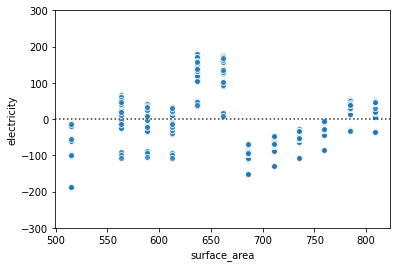

In [56]:
sns.residplot(x = 'surface_area', 
              y = 'electricity', 
              data = Elec,
              order = 1, 
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()


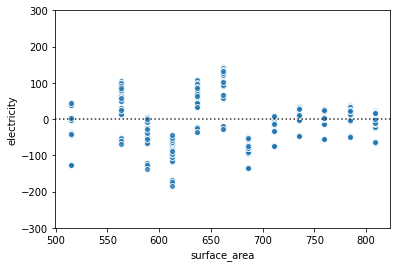

In [55]:
sns.residplot(x = 'surface_area', 
              y = 'electricity', 
              data = Elec,
              order = 5, 
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()


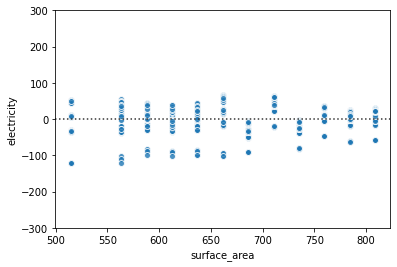

In [57]:
sns.residplot(x = 'surface_area', 
              y = 'electricity', 
              data = Elec,
              order = 9, 
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()


# 3. Testing Error


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
Elec = pd.read_csv(url)
Elec.shape

(768, 9)

#Train_data vs Test_data

*DataFrame Split*

*8:2 split*

//80% Train // 20% Test

In [60]:
from sklearn.model_selection import train_test_split
TR_Elec, TE_Elec = train_test_split(Elec, test_size = 0.2, 
                                    random_state = 2045)


In [61]:
TR_Elec.shape, TE_Elec.shape


((614, 9), (154, 9))

In [62]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


In [63]:
TE_Elec.head()


,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']], 
                                                    Elec['electricity'], 
  test_size = 0.2, 
  random_state = 2045)


In [65]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((614, 1), (614,), (154, 1), (154,))

In [66]:
X_train.head()


,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


In [67]:
y_train.head()


555    145.5
355    389.8
200    264.4
669    163.5
561    147.0
Name: electricity, dtype: float64

*Distribution Visualization*

*Train data*

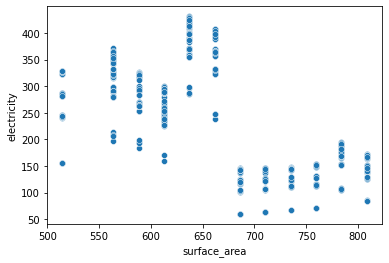

In [71]:
sns.scatterplot(TR_Elec['surface_area'], TR_Elec['electricity'])
plt.show()

*Test data*

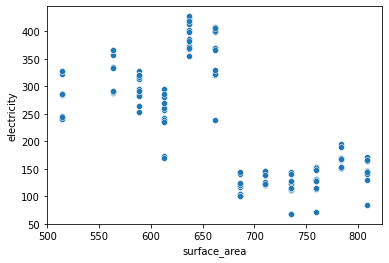

In [73]:
sns.scatterplot(TE_Elec['surface_area'], TE_Elec['electricity'])
plt.show()

#1st Model Testing Error

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)


y_hat_1 = Model_1.predict(X_test)

TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

6044.176547629271

#5th Model Testing Error

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

PX_5_TE = poly.fit_transform(X_test)
y_hat_5 = Model_5.predict(PX_5_TE)


TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

4330.604566409499

#9th Model Testing Error

In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

PX_9_TE = poly.fit_transform(X_test)
y_hat_9 = Model_9.predict(PX_9_TE)


TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

4238.689067137633

# Testing Error Comparison between 3 models

In [80]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)


1차 모델 :  6044.176547629271
5차 모델 :  4330.604566409499
9차 모델 :  4238.689067137633


#Validation Approach

*   6:2:2 split



In [81]:
import pandas as pd

In [82]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
Elec = pd.read_csv(url)
Elec.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [83]:
from sklearn.model_selection import train_test_split
X_remain, X_test, y_remain, y_test = train_test_split(Elec[['surface_area']], 
                                                      Elec['electricity'], 
    test_size = int(len(Elec) * 0.2),
                                                      random_state = 2045)
print(X_remain.shape, y_remain.shape)
print(X_test.shape, y_test.shape)


(615, 1) (615,)
(153, 1) (153,)


In [84]:
X_train, X_valid, y_train, y_valid = train_test_split(X_remain, y_remain, 
                                                      test_size = int(len(Elec) * 0.2), 
                                                      random_state = 2045)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)


(462, 1) (462,)
(153, 1) (153,)
(153, 1) (153,)


# 5th Model Validation Error

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)


Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

PX_5_VD = poly.fit_transform(X_valid)
y_hat_5 = Model_5.predict(PX_5_VD)

MSE_5 = mean_squared_error(y_valid, y_hat_5)
MSE_5



4136.4312593408395

# 9th Model Validation Error

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)


Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

PX_9_VD = poly.fit_transform(X_valid)
y_hat_9 = Model_9.predict(PX_9_VD)

MSE_9 = mean_squared_error(y_valid, y_hat_9)
MSE_9



3955.9733124909912

# Testing Error Comparison between 2 models

In [87]:
print('5차 모델 MSE_5  : ', MSE_5)
print('9차 모델 MSE_9  : ', MSE_9)


5차 모델 MSE_5  :  4136.4312593408395
9차 모델 MSE_9  :  3955.9733124909912


# Finally Apply to Test_Data using 9th Model

In [88]:
PX9_TE = poly.fit_transform(X_test)
mean_squared_error(y_test, Model_9.predict(PX9_TE))


4220.88573210769

# **The END**